# Quicklook

In [32]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import glob
sns.set_theme(style="darkgrid")

In [35]:
# Select the drone
drone = 'MAVIC' # 'M300' or 'MAVIC'

In [36]:
path_to_fr = '/home/agostino/Desktop/droni/volo_20251103_arluno/data/'+drone+'/FlightRecords/'

listoffiles_fr = sorted(glob.glob(path_to_fr+'*csv'))
listoffiles_fr # It contains all files the selected directory.

['/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[11-34-00].csv',
 '/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[11-46-44].csv',
 '/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[12-00-40].csv',
 '/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv',
 '/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[15-01-10].csv',
 '/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[15-37-32].csv',
 '/home/agostino/Desktop/droni/volo_20251103_arluno/data/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[15-46-19].csv']

In [54]:
# Read all files in the listoffiles_fr

df = pd.concat((pd.read_csv(f) for f in listoffiles_fr), ignore_index=True)
# Check the columns contained in the original files.
for kk in range(len(df.columns)):
    print(df.columns[kk])
    
# Select only relevant columns
fr_df = df[['CUSTOM.dateTime', 'OSD.latitude', 'OSD.longitude', 'OSD.height', 'OSD.xSpeed', 'OSD.ySpeed', 'OSD.zSpeed']].copy()
# Also OSD.pitch, OSD.roll and OSD.yaw are present.

CUSTOM.dateTime
OSD.flyTime
OSD.latitude
OSD.longitude
OSD.height
OSD.heightMax
OSD.vpsHeight
OSD.altitude
OSD.xSpeed
OSD.xSpeedMax
OSD.ySpeed
OSD.ySpeedMax
OSD.zSpeed
OSD.zSpeedMax
OSD.pitch
OSD.roll
OSD.yaw
OSD.flycState
OSD.flycCommand
OSD.flightAction
OSD.isGPSUsed
OSD.nonGPSCause
OSD.gpsNum
OSD.gpsLevel
OSD.droneType
OSD.isSwaveWork
OSD.waveError
OSD.goHomeStatus
OSD.batteryType
OSD.isOnGround
OSD.isMotorOn
OSD.isMotorBlocked
OSD.motorStartFailedCause
OSD.isImuPreheated
OSD.imuInitFailReason
OSD.isAcceleratorOverRange
OSD.isBarometerDeadInAir
OSD.isCompassError
OSD.isGoHomeHeightModified
OSD.canIOCWork
OSD.isNotEnoughForce
OSD.isOutOfLimit
OSD.isPropellerCatapult
OSD.isVibrating
OSD.isVisionUsed
OSD.voltageWarning
GIMBAL.mode
GIMBAL.pitch
GIMBAL.roll
GIMBAL.yaw
GIMBAL.isPitchAtLimit
GIMBAL.isRollAtLimit
GIMBAL.isYawAtLimit
GIMBAL.isStuck
CAMERA.isPhoto
CAMERA.isVideo
CAMERA.sdCardIsInserted
CAMERA.sdCardState
RC.downlinkSignal
RC.uplinkSignal
RC.aileron
RC.elevator
RC.throttle
RC.

/tmp/ipykernel_95725/3060621413.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in listoffiles_fr), ignore_index=True)


In [41]:
# Convert time info in UTC datetime.
fr_df['CUSTOM.dateTime_dt'] = pd.to_datetime(fr_df['CUSTOM.dateTime'], format='ISO8601',utc=True)

# Filter sampling errors.
median_time = fr_df['CUSTOM.dateTime_dt'].median()
i_to_drop = fr_df.loc[(fr_df['CUSTOM.dateTime_dt'] > median_time+pd.Timedelta(1,'day')) | (fr_df['CUSTOM.dateTime_dt'] < median_time-pd.Timedelta(1,'day'))].index
print(f"Dropping {len(i_to_drop)} rows with datetime errors.")
fr_df.drop(axis=0, index=i_to_drop,inplace=True)
fr_df

Dropping 0 rows with datetime errors.


,CUSTOM.dateTime,OSD.latitude,OSD.longitude,OSD.height,OSD.xSpeed,OSD.ySpeed,OSD.zSpeed,CUSTOM.dateTime_dt
0,2025-11-03T10:34:00.843Z,45.520419,8.942677,0.0,0.0,0.0,0.0,2025-11-03 10:34:00.843000+00:00
1,2025-11-03T10:34:00.843Z,45.520419,8.942677,0.0,0.0,0.0,0.0,2025-11-03 10:34:00.843000+00:00
2,2025-11-03T10:34:00.954Z,45.520419,8.942677,0.0,0.0,0.0,0.0,2025-11-03 10:34:00.954000+00:00
3,2025-11-03T10:34:01.060Z,45.520419,8.942677,0.0,0.0,0.0,0.0,2025-11-03 10:34:01.060000+00:00
4,2025-11-03T10:34:01.168Z,45.520419,8.942677,0.0,0.0,0.0,0.0,2025-11-03 10:34:01.168000+00:00
...,...,...,...,...,...,...,...,...
46699,2025-11-03T14:58:19.280Z,45.520427,8.942672,0.2,0.0,0.0,0.0,2025-11-03 14:58:19.280000+00:00
46700,2025-11-03T14:58:19.381Z,45.520427,8.942672,0.2,0.0,0.0,0.0,2025-11-03 14:58:19.381000+00:00
46701,2025-11-03T14:58:19.489Z,45.520427,8.942672,0.2,0.0,0.0,0.0,2025-11-03 14:58:19.489000+00:00
46702,2025-11-03T14:58:19.593Z,45.520427,8.942672,0.2,0.0,0.0,0.0,2025-11-03 14:58:19.593000+00:00


<Axes: xlabel='Time [UTC]', ylabel='MAVIC height [m]'>

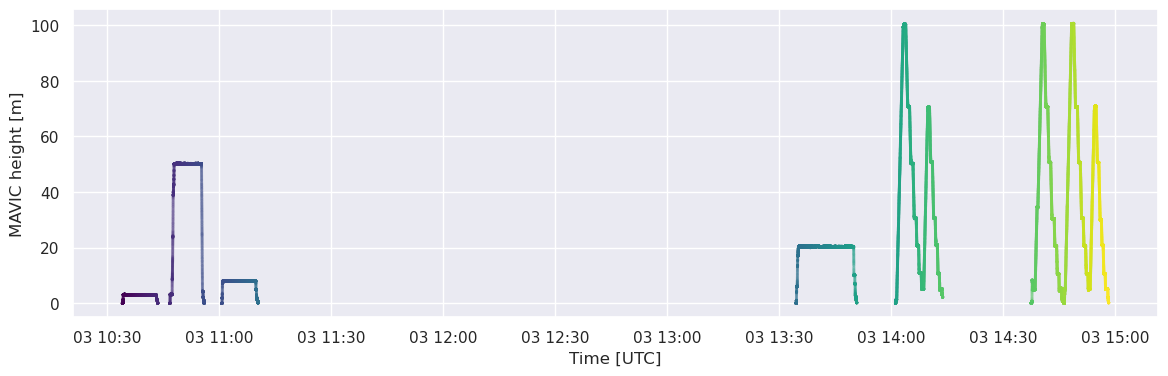

In [46]:
# Plot a time series of the height of the drone for all files considered.

fig,axes=plt.subplots(1,1,figsize=(14,4))

plt.xlabel('Time [UTC]')
plt.ylabel(drone + ' height [m]')

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='OSD.height',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes,
        edgecolor=None,
        s=4,
        alpha=0.3,
        palette='viridis',
    )

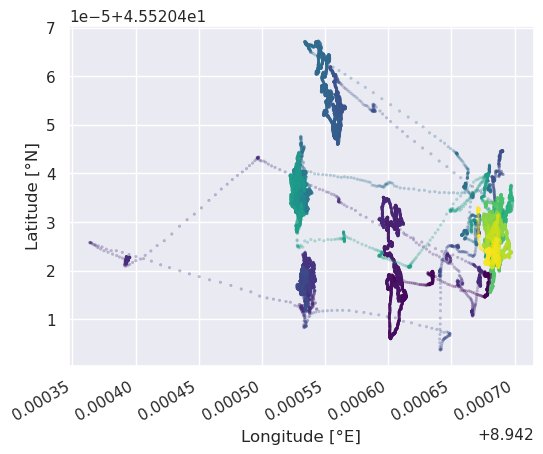

In [45]:
# Plot the horizontal trajectory for the entire session.

fig,axes=plt.subplots(1,1,figsize=(6,5))

plt.xlabel('Longitude [°E]')
plt.ylabel('Latitude [°N]')

sns.scatterplot(
        data=fr_df,
        x='OSD.longitude',
        y='OSD.latitude',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes,
        edgecolor=None,
        s=4,
        alpha=0.3,
        palette='viridis',
    )

fig.autofmt_xdate(rotation=30, ha='right')
